<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/Graphes_Parcours_en_profondeur_(DFS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graphes - Parcours en profondeur (DFS)**

Dans ce chapitre, nous allons découvrir comment **parcourir un graphe ou un arbre** en partant d'un sommet source, et en explorant tous les chemins possibles. Notre objectif sera de déterminer s'il existe un chemin reliant tous les sommets. Attention toutefois : on ne garanti pas que l'on identifiera le chemin le plus court.

La méthode que nous allons étudier est l'algorithme du parcours en profondeur, appelé aussi **DFS** pour Depth First Search. L'idée derrière cet algorithme est de parcourir un graphe ou un arbre en partant d'un sommet source, puis d'emprunter un chemin aléatoire jusqu'à atteindre un sommet déjà visité ou un cul-de-sac. On revient alors sur le dernier sommet (**backtrack**) où on pouvait suivre un autre chemin que l'on expore, jusqu'à ce que tous les sommets aient été visités.

Commençons par importer les modules nécessaires.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

En cas d'erreur sur ce bloc d'instructions, lancez l'installation des modules matplotlib et networkx, redémarrez le noyau, puis re-exécutez la dernière cellule de code.

In [ ]:
import sys  
!{sys.executable} -m pip install --user matplotlib
!{sys.executable} -m pip install --user networkx


Voici maintenant un graphe qui illustrera le propos :

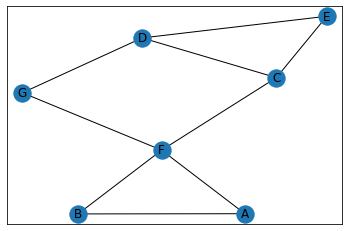

In [2]:
D = dict()
D['A'] = {'B','F'}
D['B'] = {'A','F'}
D['C'] = {'D','E','F'}
D['D'] = {'C','E','G'}
D['E'] = {'C','D'}
D['F'] = {'A','B','C','G'}
D['G'] = {'D','F'}

G = nx.Graph(D)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

Admettons que l'on cherche à connaitre tous les sommets que l'on peut atteindre à partir du sommet 'A' (appelé sommet source).

Nous allons résoudre ce problème en utilisante une [Pile](https://mybinder.org/v2/gh/GeoLabUniLaSalle/Python/HEAD?filepath=Les_piles.ipynb) et en suivant la stratégie suivante :

1.   On empile le sommet source

Tant que la pile n'est pas vide :
2.   On empile tous les sommets adjacents au sommet qui est au dessus de la pile, en y associant le sommet à partir duquel il a été découvert
3.   Si le sommet au dessus de la pile n'a plus de voisins à explorer, on le dépile


Voici l'algorithme **DFS** appliqué à notre graphe, dans lequel nous utiliserons :

*   **P**, un dictionnnaire qui stocke les sommets qui ont été parcourus, en y associant le sommet à partir duquel il a été découvert
*   **couleur**, un dictionnaire qui stocke la couleur des sommets : 'green' pour pas encore examiné, 'orange' pour en cours d'examination, et 'red' pour plus de voisins à examiner
*   **Q**, la pile qui servira à appliquer la stratégie exposée plus haut


Initialisation du noeud A qui prend la couleur 'orange' (en cours d'examination)


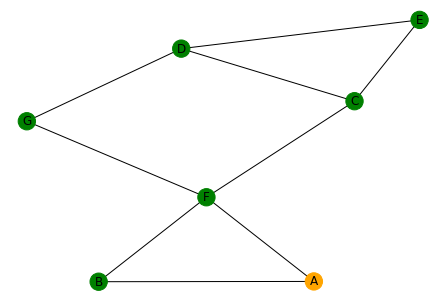

Traitement du noeud B qui prend la couleur 'orange' (en cours d'examination)


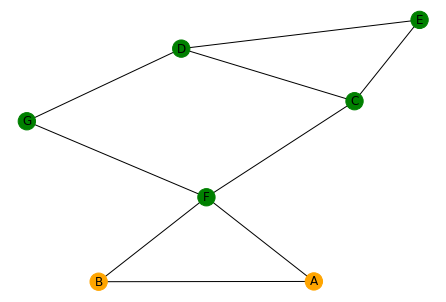

Traitement du noeud F qui prend la couleur 'orange' (en cours d'examination)


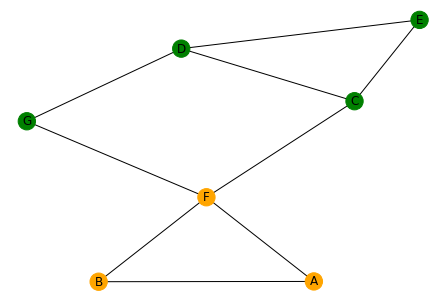

Traitement du noeud C qui prend la couleur 'orange' (en cours d'examination)


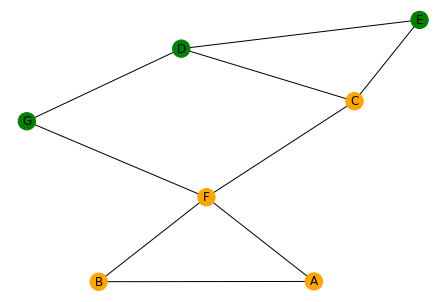

Traitement du noeud D qui prend la couleur 'orange' (en cours d'examination)


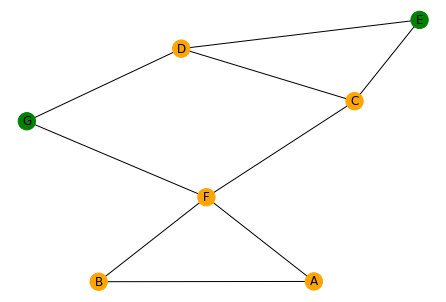

Traitement du noeud E qui prend la couleur 'orange' (en cours d'examination)


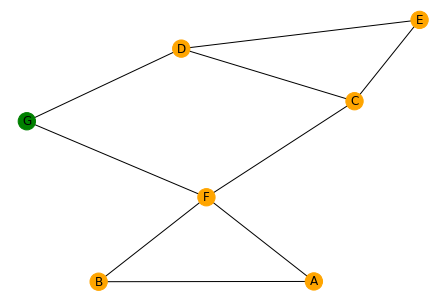

E est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré


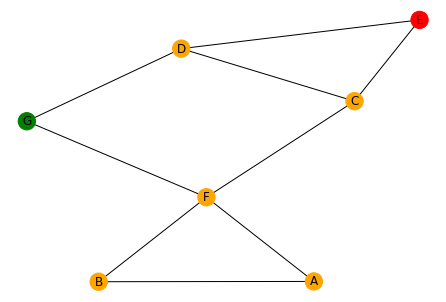

Traitement du noeud G qui prend la couleur 'orange' (en cours d'examination)


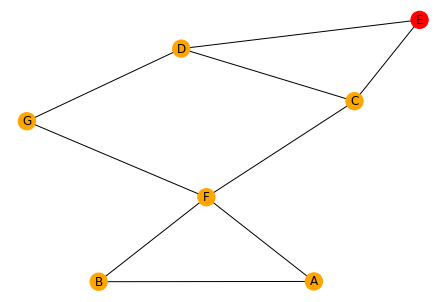

G est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré


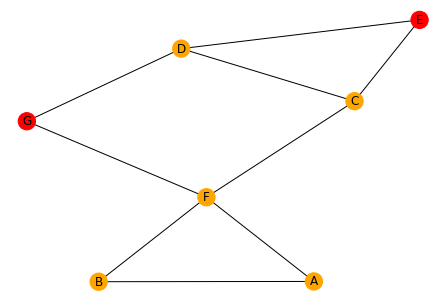

D est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré


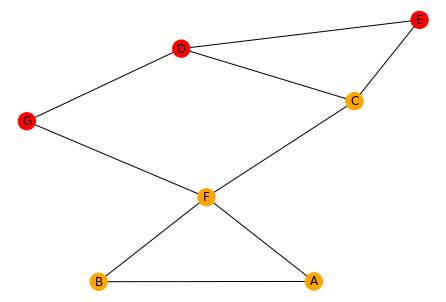

C est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré


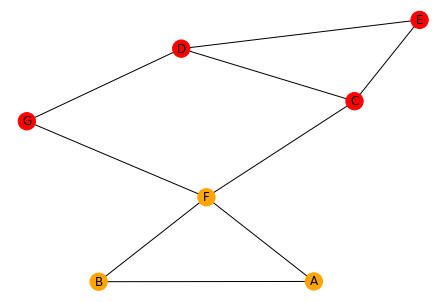

F est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré


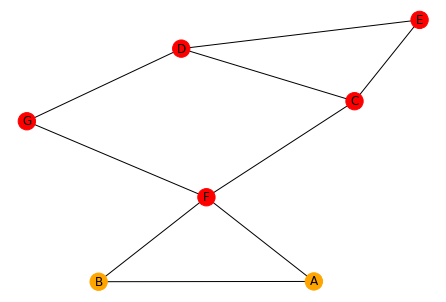

B est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré


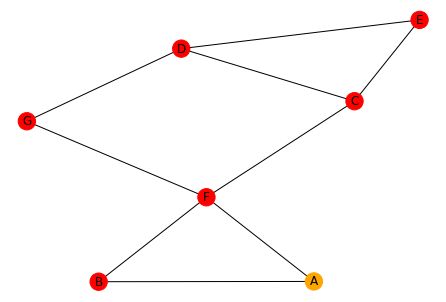

A est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré


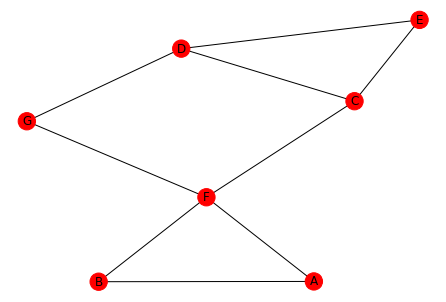

Fin du traitement : tous les sommets ont été examinés
Liste des arêtes qui peuvent être parcourues à partir du sommet A : {'A': None, 'B': 'A', 'F': 'B', 'C': 'F', 'D': 'C', 'E': 'D', 'G': 'D'}


In [3]:
class Pile:
  
  def __init__(self):
    self.elements = []
    
  def empile(self, element):
    self.elements.append(element)

  def depile(self):
    if self.elements:
      return self.elements.pop()
  
  def taille(self):
    return len(self.elements)

  def sommet(self):
    if len(self.elements)==0:
         raise Exception("La pile est vide")
    return self.elements[-1]
    
  def __str__(self):
    out = str(self.elements[0])
    for x in self.elements[1:]:
      out = str(x) + " -> " + out
    out = "Pile : " + out
    return out

def affiche_graphe(G,couleur):
  color_map=[]
  for i in G:
    color_map.append(couleur[i])
  nx.draw(G, pos, node_color=color_map, with_labels=True)
  plt.show()

def dfs(G,s) :
  couleur=dict()
  for v in G :
    couleur[v]='green'
  P={s:None}
  couleur[s]='orange'
  Q=Pile()
  Q.empile(s)

  # Affichage du graphe
  print("Initialisation du noeud A qui prend la couleur 'orange' (en cours d'examination)")
  affiche_graphe(G,couleur)

  while Q.taille()!=0 :
    u=Q.sommet()
    R=[y for y in G[u] if couleur[y]=='green']
    if R :
      v=R[0]
      couleur[v]='orange'
      P[v]=u
      Q.empile(v)

      # Affichage du graphe
      print('Traitement du noeud',v,"qui prend la couleur 'orange' (en cours d'examination)")
      affiche_graphe(G,couleur)

    else :
      Q.depile()
      couleur[u]='red'

      # Affichage du graphe
      print(u,"est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré")
      affiche_graphe(G,couleur)
  
  print('Fin du traitement : tous les sommets ont été examinés')
  return P

P = dfs(G,'A')
print("Liste des arêtes qui peuvent être parcourues à partir du sommet A :",P) # On affiche toutes les arêtes dans l'ordre de parcours, en partant du sommet 'A'

Sans les affichages explicatifs, cela donne :

In [4]:
def dfs(G,s) :
  P={s:None}
  Q=Pile()
  Q.empile(s)

  while Q.taille()!=0 :
    u=Q.sommet()
    R=[y for y in G[u] if y not in P]
    if R :
      v=R[0]
      P[v]=u
      Q.empile(v)
    else :
      Q.depile()
  return P

P = dfs(G,'A')
print("Liste des arêtes qui peuvent être parcourues à partir du sommet A :",P)

Liste des arêtes qui peuvent être parcourues à partir du sommet A : {'A': None, 'B': 'A', 'F': 'B', 'C': 'F', 'D': 'C', 'E': 'D', 'G': 'D'}


Il est possible d'utiliser une Pile sans se servir de la classe Pile, mais en utilisant une simple liste.

In [5]:
def dfs(G,s) :
  P={s:None}
  Q=[s]

  while Q:
    u=Q[-1]
    R=[y for y in G[u] if y not in P]
    if R :
      v=R[0]
      P[v]=u
      Q.append(v)
    else :
      Q.pop()
  return P

P = dfs(G,'A')
print("Liste des arêtes qui peuvent être parcourues à partir du sommet A :",P)

Liste des arêtes qui peuvent être parcourues à partir du sommet A : {'A': None, 'B': 'A', 'F': 'B', 'C': 'F', 'D': 'C', 'E': 'D', 'G': 'D'}


Voici une version récursive de cet algorithme :

In [6]:
def dfs(G,s,parent=None,P={}):
  if s not in P:
    P[s]=parent
    for v in G[s]:
      dfs(G,v,s,P)
  return P
  
P = dfs(G,'A')
print("Liste des arêtes qui peuvent être parcourues à partir du sommet A :",P)

Liste des arêtes qui peuvent être parcourues à partir du sommet A : {'A': None, 'B': 'A', 'F': 'B', 'C': 'F', 'D': 'C', 'E': 'D', 'G': 'D'}


Dans tous les cas, nous obtenons alors un chemin permettant de relier chaque sommet au sommet source 'A'.

Nous remarquons que si l'on ne conserve que les arêtes qui composent ce chemin, cela nous donne un arbre couvrant :

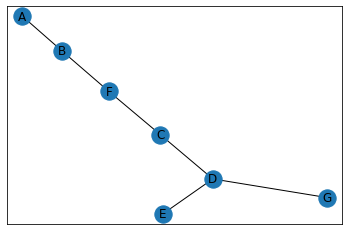

In [7]:
G = nx.Graph()

for i in P:
  if P[i]!=None:
    G.add_edge(i,P[i])

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

l'algorithme **dfs** sert en particulier à déterminer si le graphe contient un **arbre couvrant** et donc s'il est **connexe**.

Le même résultat peut être obtenu sans recoder la fonction bfs, mais en utilisant les fonctions du module NetworkX.

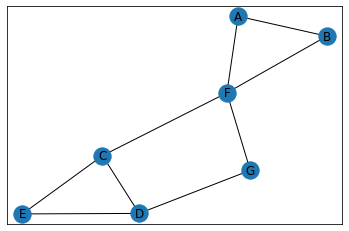

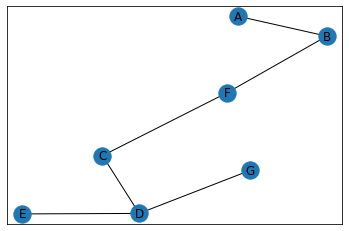

[('A', 'B'), ('B', 'F'), ('F', 'C'), ('C', 'D'), ('D', 'E'), ('D', 'G')]


In [8]:
D = dict()
D['A'] = {'B','F'}
D['B'] = {'A','F'}
D['C'] = {'D','E','F'}
D['D'] = {'C','E','G'}
D['E'] = {'C','D'}
D['F'] = {'A','B','C','G'}
D['G'] = {'D','F'}

import networkx as nx

G = nx.Graph(D)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

Gdfs = nx.Graph(nx.dfs_tree(G,'A'))

nx.draw_networkx_nodes(Gdfs, pos)
nx.draw_networkx_labels(Gdfs, pos)
nx.draw_networkx_edges(Gdfs, pos)

plt.show()

print(list(nx.dfs_edges(G,'A')))

Toutes les méthodes vues ici fonctionnent aussi sur des **graphes orientés**.

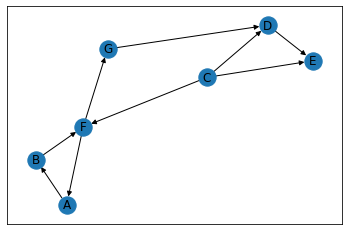

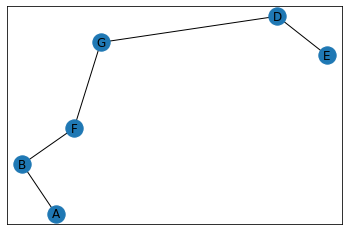

[('A', 'B'), ('B', 'F'), ('F', 'G'), ('G', 'D'), ('D', 'E')]


In [9]:
D = dict()
D['A'] = {'B'}
D['B'] = {'F'}
D['C'] = {'D','E','F'}
D['D'] = {'E'}
D['E'] = {}
D['F'] = {'A','G'}
D['G'] = {'D'}

import networkx as nx

G = nx.DiGraph(D)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

Gdfs = nx.Graph(nx.dfs_tree(G,'A'))

nx.draw_networkx_nodes(Gdfs, pos)
nx.draw_networkx_labels(Gdfs, pos)
nx.draw_networkx_edges(Gdfs, pos)

plt.show()

print(list(nx.dfs_edges(G,'A')))

Notons que dans cet exemple, le sommet 'C' ne peut être atteint par aucun chemin. Il disparait alors de l'arbre obtenu.